# Testing Renaissance with Run With History

This notebook demonstrates the use of the new `run_with_history` function, which provides a comprehensive view of the Renaissance system's behavior across multiple iterations.

In [1]:
import os
import sys
import json
from pprint import pprint

# Add the parent directory to path for imports
sys.path.insert(0, os.path.abspath('..'))

from renaissance import (
    run_with_history,
    get_llm_provider,
    load_config_from_file
)

INFO:renaissance.config:Loaded default configuration from /Users/rezajamei/Desktop/repos/renaissance/configs/default.json


## Setup LLM Provider

Choose your preferred LLM provider. For meaningful testing, always use a real LLM, not the mock provider.

In [2]:
# Uncomment and use your preferred provider

# OpenAI
llm = get_llm_provider("openai", model="gpt-4-turbo")

# Claude
# llm = get_llm_provider("claude", model="claude-3-opus-20240229")

# For demonstration purposes only - DO NOT USE FOR REAL TESTING
# llm = get_llm_provider("mock")

## Load Configuration

Load your preferred configuration variant.

In [3]:
# Load default configuration
config = load_config_from_file("../configs/autonomous_research.json")

# Alternatively, load a specialized configuration
# config = load_config_from_file("../configs/coding_oriented.json")

## Run Test with History Tracking

Define your test query and run Renaissance with history tracking.

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
ERROR:yfinance:$FB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
ERROR:yfinance:$FB: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP 

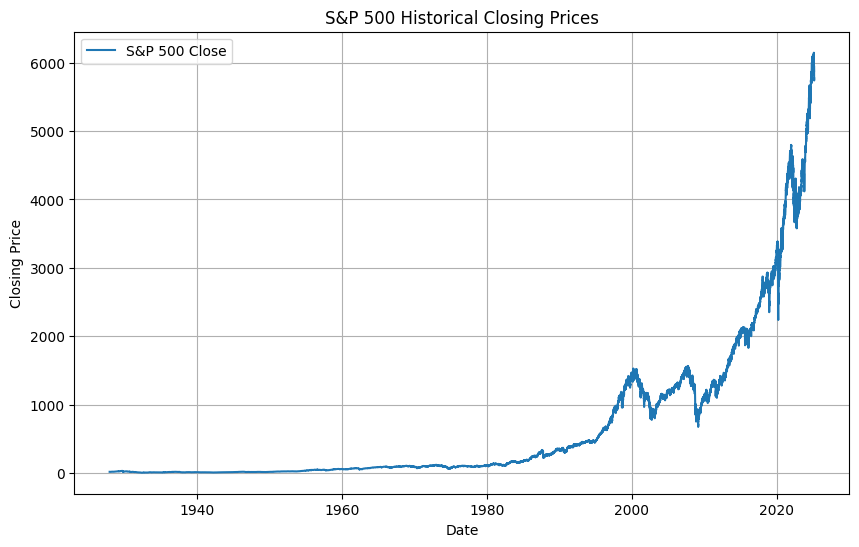

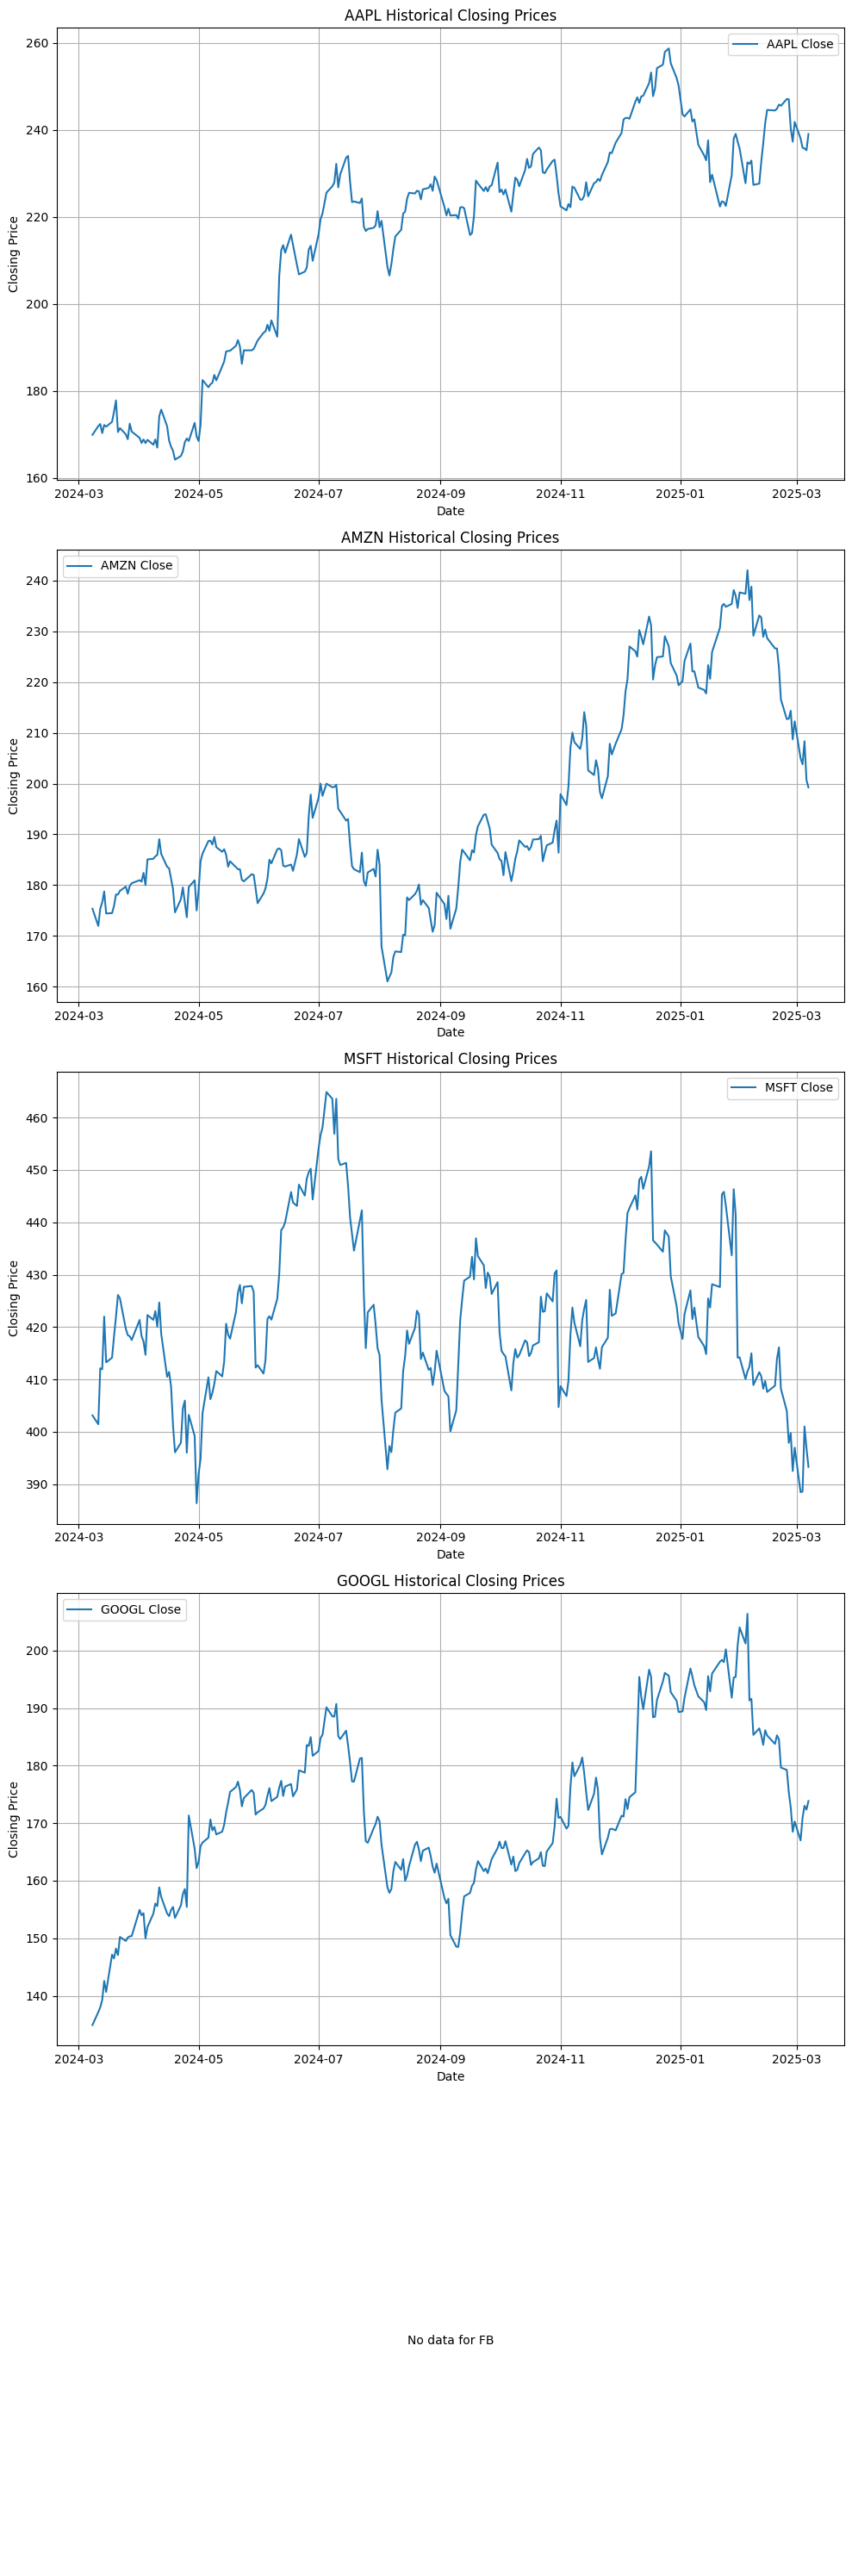

In [4]:
# Define your test query
user_request = '''
Look up various metrics of the US stock market and let me know what metric or combination of metrics looks most unusual
compared to historical norms. 
'''
# Run with history tracking
result = run_with_history(
    llm_obj=llm,
    user_request=user_request,
    config=config,
    iterations=10  # Adjust as needed
)

## Analyze Results

Explore the rich information captured during execution.

In [5]:
# Basic statistics
# print(f"Total execution time: {result['stats']['total_time']:.2f} seconds")
# print(f"Iterations completed: {result['stats']['iterations_completed']}")
# print(f"Early finish: {result['stats']['early_finish']}")
# print()

In [6]:
# Review changes in each iteration
# for i, iteration in enumerate(result['iterations']):
#     print(f"Iteration {i+1}:")
#     print(f"Time taken: {iteration['time_taken']:.2f} seconds")
#     print("Changes:")
#     for change in iteration['changes']:
#         print(f"  - {change}")
#     print()

## Save Results

Optionally save the complete results for later analysis.

In [ ]:
# Save results to a file for later reference
def save_results(result, filename):
    with open(filename, 'w') as f:
        json.dump(result, f, indent=2)
    print(f"Results saved to {filename}")

# Uncomment to save results
# save_results(result, 'test_results.json')

In [20]:
result.keys()

dict_keys(['request', 'config', 'iterations', 'final_document', 'stats'])

In [9]:
fin = result['final_document']

In [10]:
beg = result['iterations'][0]['document_before']

In [11]:
beg.keys()

dict_keys(['Goal', 'Doc_Structure', 'User_Request', 'Formatting_of_Requests', 'Previous_Analysis_Summary', 'Working_Memory', 'Findings', 'Status'])

In [12]:
fin.keys()

dict_keys(['Goal', 'Doc_Structure', 'User_Request', 'Formatting_of_Requests', 'Previous_Analysis_Summary', 'Working_Memory', 'Findings', 'Status', 'Table_of_Contents', 'KnowledgeBase', 'WorkingMemory', 'Initial Task Breakdown', 'TaskQueue', 'Error_Log', 'Data_Analysis_Plan'])

In [13]:
for k in beg:
    print(f"{k} constant?  {beg[k]==fin[k]}")

Goal constant?  True
Doc_Structure constant?  True
User_Request constant?  True
Formatting_of_Requests constant?  True
Previous_Analysis_Summary constant?  True
Working_Memory constant?  False
Findings constant?  True
Status constant?  False


In [41]:
fin['Findings']

''

In [14]:
beg

{'Goal': "You are a researcher in an autonomous research team. Your goal is to make significant progress on the problem described in the User_Request section by working iteratively and systematically, and by continuously refining the research approach and this document itself as needed. This includes handling errors effectively and proposing improvements to the document's structure and instructions.",
 'Doc_Structure': 'This document is structured using XML tags for different sections. Each section has a specific purpose:\n\n  <User_Request>\n  The original problem statement from the user.\n  </User_Request>\n\n  <TaskQueue>\n  A prioritized list of tasks, marked as Completed, In Progress, or Backlog.\n  Use this to break down complex problems into smaller, manageable sub-tasks. This improves error isolation and recovery.\n  </TaskQueue>\n\n  <WorkingMemory>\n  Information relevant to the current iteration. Use this as your scratch space.  This is your PRIMARY source of information for

In [15]:
fin

{'Goal': "You are a researcher in an autonomous research team. Your goal is to make significant progress on the problem described in the User_Request section by working iteratively and systematically, and by continuously refining the research approach and this document itself as needed. This includes handling errors effectively and proposing improvements to the document's structure and instructions.",
 'Doc_Structure': 'This document is structured using XML tags for different sections. Each section has a specific purpose:\n\n  <User_Request>\n  The original problem statement from the user.\n  </User_Request>\n\n  <TaskQueue>\n  A prioritized list of tasks, marked as Completed, In Progress, or Backlog.\n  Use this to break down complex problems into smaller, manageable sub-tasks. This improves error isolation and recovery.\n  </TaskQueue>\n\n  <WorkingMemory>\n  Information relevant to the current iteration. Use this as your scratch space.  This is your PRIMARY source of information for